#### 1. Import niezbędnych pakietów, w tym niezbędnych podmodułów `datamining`

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datamining.check import check_numeric_data, check_category_data
from datamining.transformations import one_hot_encoding, standarization
from datamining.regression import BestMultipleLinearRegression, BestSimpleLinearRegression

#### 2. Import danych `diamonds.csv` do projektu

In [2]:
diamonds = pd.read_csv('C:/My-Engineering-Thesis/ET/diamonds.csv', index_col=0)

#### 3. Wyświetlenie danych

In [3]:
print(diamonds.head())

   carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


#### 4. Podejrzenie podstawowych statystyk i informacji o kolumnach typu numerycznego i kategorycznego wykorzystując metody `check_numeric_data` i `check_category_data` z pakietu `datamining`

In [5]:
check_numeric_data(df=diamonds, use=True)

,NAME,TYPE,NaN,AVG,Q25,MED,Q75,IQR,MIN,MAX,RAN,STD,SUM,LOW OUT,UPP OUT
0,carat,float64,0,0.8,0.4,0.7,1.0,0.6,0.2,5.0,4.8,0.5,43040.9,0,1889
1,depth,float64,0,61.7,61.0,61.8,62.5,1.5,43.0,79.0,36.0,1.4,3330762.9,1506,1039
2,table,float64,0,57.5,56.0,57.0,59.0,3.0,43.0,95.0,52.0,2.2,3099240.5,16,589
3,price,int64,0,3932.8,950.0,2401.0,5324.2,4374.2,326.0,18823.0,18497.0,3989.4,212135217.0,0,3540
4,x,float64,0,5.7,4.7,5.7,6.5,1.8,0.0,10.7,10.7,1.1,309138.6,8,24
5,y,float64,0,5.7,4.7,5.7,6.5,1.8,0.0,58.9,58.9,1.1,309320.3,7,22
6,z,float64,0,3.5,2.9,3.5,4.0,1.1,0.0,31.8,31.8,0.7,190879.3,21,28


In [6]:
check_category_data(df=diamonds, use=True)

,NAME,TYPE,NaN,UNIQUE,MODE,FREQ,FIRST,LAST
0,cut,object,0,5,Ideal,21551,Ideal,Ideal
1,color,object,0,7,G,11292,E,D
2,clarity,object,0,8,SI1,13065,SI2,SI2


#### 5. Wykorzystanie metody `one_hot_encoding` z pakietu `datamining` do zamiany zmiennych kategorycznych na numeryczne

In [7]:
diamonds_numeric = one_hot_encoding(df=diamonds, columns=['cut', 'color', 'clarity'], prefix_sep=' -> ', values=[1, 0])
print(diamonds_numeric)

       carat  depth  table  price     x     y     z  cut -> Fair  cut -> Good  \
1       0.23   61.5   55.0    326  3.95  3.98  2.43            0            0   
2       0.21   59.8   61.0    326  3.89  3.84  2.31            0            0   
3       0.23   56.9   65.0    327  4.05  4.07  2.31            0            1   
4       0.29   62.4   58.0    334  4.20  4.23  2.63            0            0   
5       0.31   63.3   58.0    335  4.34  4.35  2.75            0            1   
...      ...    ...    ...    ...   ...   ...   ...          ...          ...   
53936   0.72   60.8   57.0   2757  5.75  5.76  3.50            0            0   
53937   0.72   63.1   55.0   2757  5.69  5.75  3.61            0            1   
53938   0.70   62.8   60.0   2757  5.66  5.68  3.56            0            0   
53939   0.86   61.0   58.0   2757  6.15  6.12  3.74            0            0   
53940   0.75   62.2   55.0   2757  5.83  5.87  3.64            0            0   

       cut -> Ideal  ...  c

#### 6. Standaryzacja wybranych zmiennych przy pomocy metody `standarization` z pakietu `datamining`

In [30]:
standarization(diamonds_numeric, columns=['carat', 'depth', 'table', 'x', 'y', 'z'])

,carat,depth,table,price,x,y,z,cut -> Fair,cut -> Good,cut -> Ideal,...,color -> I,color -> J,clarity -> I1,clarity -> IF,clarity -> SI1,clarity -> SI2,clarity -> VS1,clarity -> VS2,clarity -> VVS1,clarity -> VVS2
1,-1.198157,-0.174090,-1.099662,326,-1.587823,-1.536181,-1.571115,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-1.240350,-1.360726,1.585514,326,-1.641310,-1.658759,-1.741159,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-1.198157,-3.384987,3.375631,327,-1.498677,-1.457382,-1.741159,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.071577,0.454129,0.242926,334,-1.364959,-1.317293,-1.287708,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,-1.029384,1.082348,0.242926,335,-1.240155,-1.212227,-1.117663,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,-0.164426,-0.662705,-0.204603,2757,0.016798,0.022304,-0.054887,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,-0.164426,0.942744,-1.099662,2757,-0.036690,0.013548,0.100987,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,-0.206619,0.733338,1.137985,2757,-0.063434,-0.047740,0.030135,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53939,0.130926,-0.523100,0.242926,2757,0.373380,0.337503,0.285201,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### 7. Wyświetlenie macierzy korelacji między zmiennymi w celu określenia, które z nich istotnie wpływają na wartość zmiennej `price`

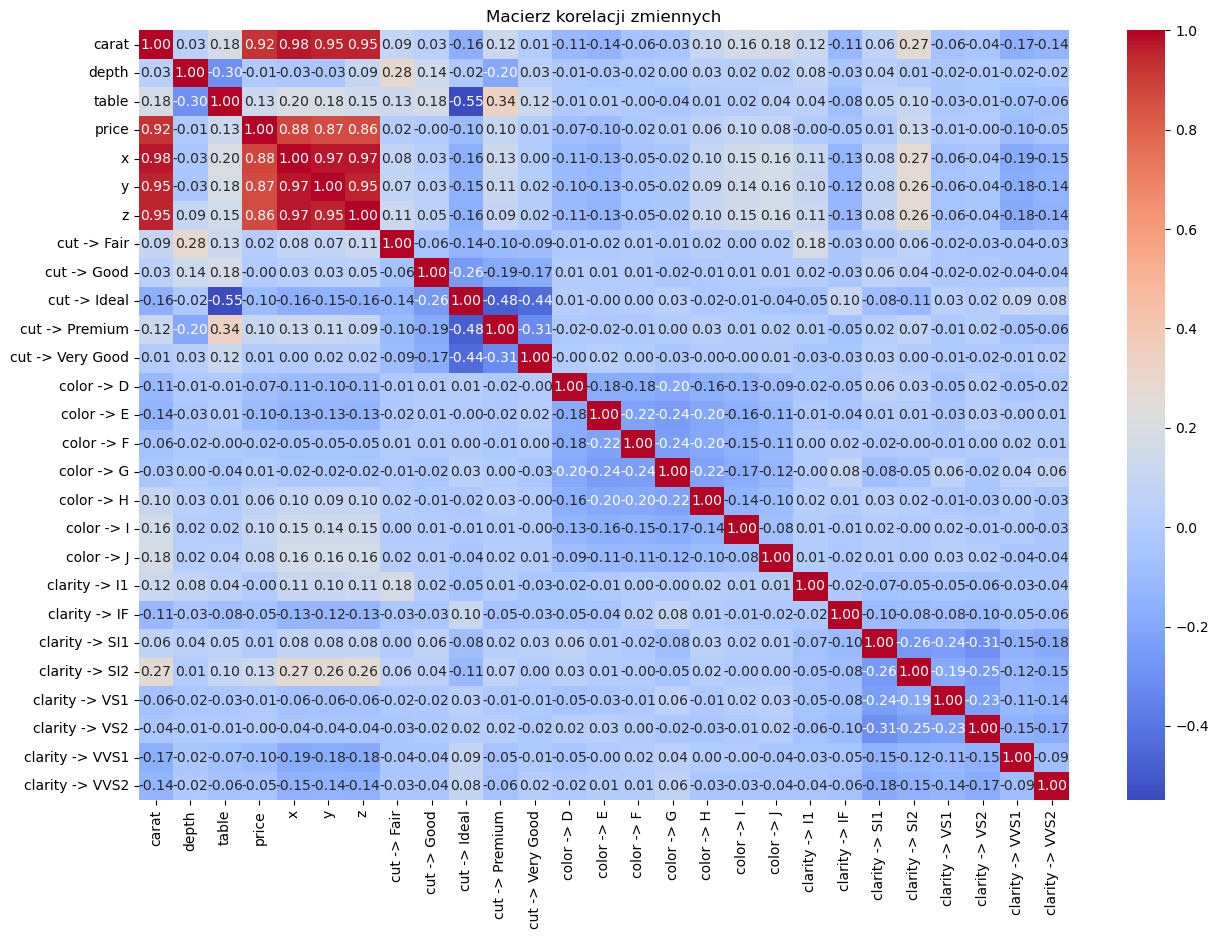

In [31]:
correlation_matrix = diamonds_numeric.corr()

plt.figure(figsize=(15, 10))
plt.title('Macierz korelacji zmiennych')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### 8. Zapisanie do zmiennej `diamonds_corr` tylko tych zmiennych, które istotnie wpływają na cenę `price`. Jako granicę uznano korelację większą o 0.5 lub mniejszą od -0.5

In [36]:
price_corr = correlation_matrix['price']
diamonds_corr = diamonds_numeric[price_corr[(price_corr > 0.5) | (price_corr < -0.5)].index]
print(diamonds_corr)

          carat  price         x         y         z
1     -1.198157    326 -1.587823 -1.536181 -1.571115
2     -1.240350    326 -1.641310 -1.658759 -1.741159
3     -1.198157    327 -1.498677 -1.457382 -1.741159
4     -1.071577    334 -1.364959 -1.317293 -1.287708
5     -1.029384    335 -1.240155 -1.212227 -1.117663
...         ...    ...       ...       ...       ...
53936 -0.164426   2757  0.016798  0.022304 -0.054887
53937 -0.164426   2757 -0.036690  0.013548  0.100987
53938 -0.206619   2757 -0.063434 -0.047740  0.030135
53939  0.130926   2757  0.373380  0.337503  0.285201
53940 -0.101136   2757  0.088114  0.118615  0.143498

[53940 rows x 5 columns]


#### 9. Utworzenie instancji klasy `BestMultipleLinearRegression`, czyli takiego modelu regresji liniowej wielorakiej, który majlepiej opisuje zmienną zależną `price`

In [41]:
instance = BestMultipleLinearRegression(df=diamonds_corr, response='price', set_seed=17, divide_method='crossvalidation', k=5)

#### 10. Wyświetlenie wykresu przedstawiającego model regresji stworzony w poprzednim punkcie, naniesiony na dane, wykorzystując metodę `plot_model`

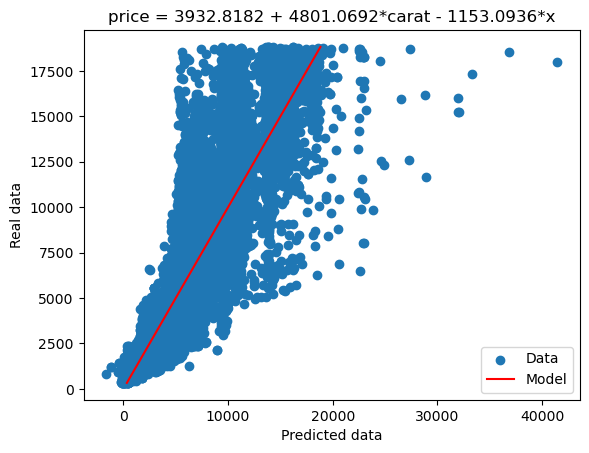

In [42]:
instance.plot_model()

#### 11. Określenie:
 - które cechy najlepiej opisują zmienną zależną `price`
 - ile wynosi wartość `r-squared` 
 - jaki jest wzór funkcji regresji
 - ile wynoszą miary opisujące model tj. MSE, RMSE, RSS, MAPE

In [46]:
print(f'Zmienne najlpiej opisujące price to: {instance.best_features}')
print(f'Accurancy modelu wynosi: {instance.r_squared}')
print(f'Wzór funkcji regresji: {instance.formula}')
print(f'MSE: {instance.mse}, RMSE: {instance.rmse}, RSS: {instance.rss}, MAPE: {instance.mape}')

Zmienne najlpiej opisujące price to: ('carat', 'x')
Accurancy modelu wynosi: 0.8533521373883468
Wzór funkcji regresji: price = 3932.8182 + 4801.0692*carat - 1153.0936*x
MSE: 2333720.635328556, RMSE: 1527.6303258922744, RSS: 25176178213.924458, MAPE: 28.112836107312866
